In [1]:
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
from pathlib import Path
import time

Damping oscillations $(0<\gamma<\omega_0)$

In [2]:
def damp_x(t,x0,k,w0):
    w1=np.sqrt(w0**2-k**2)
    return x0*np.exp(-k*t)*np.cos(w1*t)
def damp_v(t,x0,k,w0):
    w1=np.sqrt(w0**2-k**2)
    return -k*x0*np.exp(-k*t)*np.cos(w1*t)-w1*x0*np.exp(-k*t)*np.sin(w1*t)

In [10]:
current_dir = current_dir = Path.cwd()
config = {
    "dt": 0.001,
    "x0": np.radians(10),
    "v0": 0.0,
    "w": 5.0,
    "k": 0.1,
    "steps": 100000/2,
    "output_path_rk4": current_dir/"output/damp_rk4.txt",
    "output_path_h": current_dir/"output/damp_h.txt",
    "output_path_e": current_dir/"output/damp_e.txt"
}

exe_path = current_dir / "simulator"
config_path = current_dir/ "config_damp.json"

config["output_path_rk4"] = str(config["output_path_rk4"])
config["output_path_h"] = str(config["output_path_h"])
config["output_path_e"] = str(config["output_path_e"])


print("exe_path:", exe_path)
print("config_path:", config_path)

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

subprocess.run([str(exe_path), str(config_path)], check=True)

exe_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator
config_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_damp.json


CompletedProcess(args=['/workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator', '/workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_damp.json'], returncode=0)

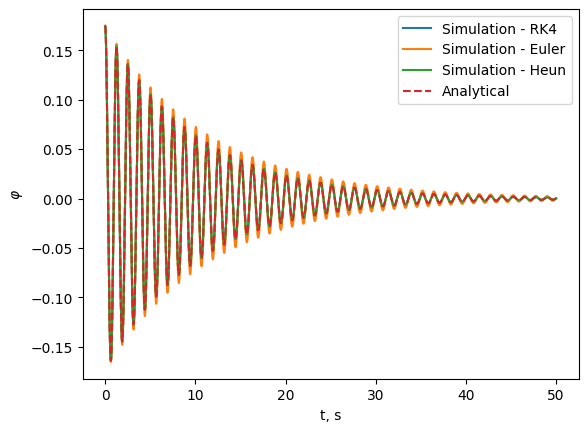

In [11]:
data_rk4 = np.loadtxt(config["output_path_rk4"])
data_h = np.loadtxt(config["output_path_h"])
data_e = np.loadtxt(config["output_path_e"])
w=config["w"]
k=config["k"]
t_rk4, x_rk4, v_rk4 = data_rk4[:, 0], data_rk4[:, 1], data_rk4[:, 2]
t_h, x_h, v_h = data_h[:, 0], data_h[:, 1], data_h[:, 2]
t_e, x_e, v_e = data_e[:, 0], data_e[:, 1], data_e[:, 2]
x_analyt = damp_x(t_rk4,x_rk4[0],k,w)
v_analyt = damp_v(t_rk4,x_rk4[0],k,w)
plt.plot(t_rk4, x_rk4, label="Simulation - RK4")
plt.plot(t_e, x_e, label="Simulation - Euler")
plt.plot(t_h, x_h, label="Simulation - Heun")
plt.plot(t_rk4,x_analyt, label="Analytical", ls="--")
plt.xlabel("t, s")
plt.ylabel(r"$\varphi$")
plt.legend()
plt.show()

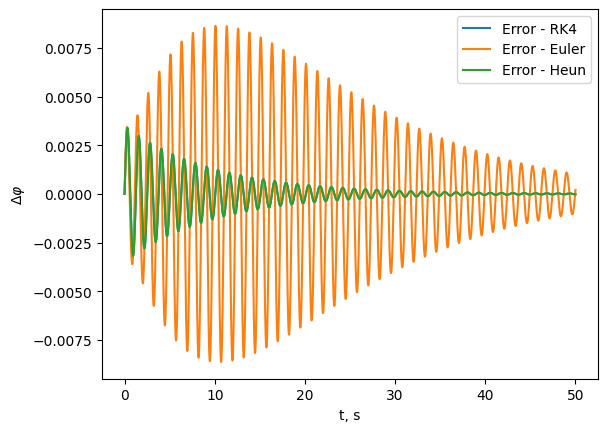

In [12]:
plt.plot(t_rk4,x_rk4-x_analyt, label="Error - RK4")
plt.plot(t_e[:-1],x_e[:-1]-x_analyt, label="Error - Euler")
plt.plot(t_h[:-1],x_h[:-1]-x_analyt, label="Error - Heun")
plt.xlabel("t, s")
plt.ylabel(r"$\Delta\varphi$")
plt.legend()
plt.show()

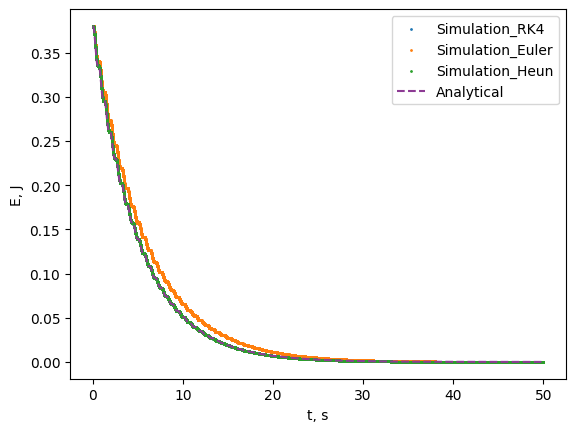

In [13]:
E_rk4=0.5 * v_rk4**2 + w**2 * (1 - np.cos(x_rk4))
plt.scatter(t_rk4, E_rk4, s=1, label="Simulation_RK4")

E_e=0.5 * v_e**2 + w**2 * (1 - np.cos(x_e))
plt.scatter(t_e, E_e, s=1, label="Simulation_Euler")

E_h=0.5 * v_h**2 + w**2 * (1 - np.cos(x_h))
plt.scatter(t_h, E_h, s=1, label="Simulation_Heun")

E_analyt = 0.5 * v_analyt**2 + w**2 * (1 - np.cos(x_analyt))
plt.plot(t_rk4, E_analyt, label="Analytical",color="#8d3b94", ls="--")
plt.xlabel("t, s")
plt.ylabel("E, J")
plt.legend()

Text(0.5, 1.0, 'Phase diagram')

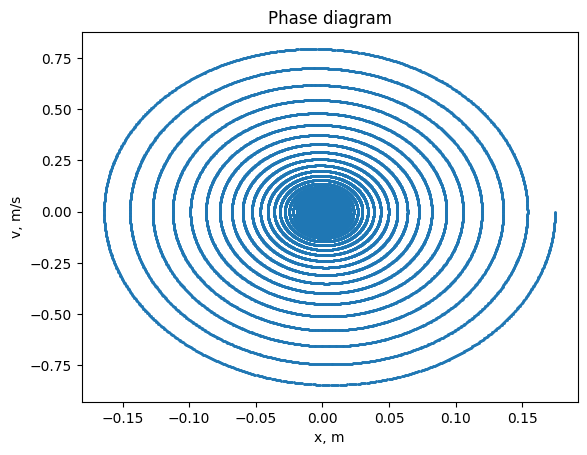

In [14]:
plt.scatter(x_rk4,v_rk4,s=1)
plt.xlabel("x, m")
plt.ylabel("v, m/s")
plt.title("Phase diagram")

Critical oscillations $(\gamma=\omega_0)$

In [15]:
current_dir = current_dir = Path.cwd()
config = {
    "dt": 0.001,
    "x0": np.radians(10),
    "v0": 0.0,
    "w": 5.0,
    "k": 5.0,
    "steps": 100000/2,
    "output_path_rk4": current_dir/"output/crit_rk4.txt",
    "output_path_h": current_dir/"output/crit_h.txt",
    "output_path_e": current_dir/"output/crit_e.txt"
}

exe_path = current_dir / "simulator"
config_path = current_dir/ "config_crit.json"

config["output_path_rk4"] = str(config["output_path_rk4"])
config["output_path_h"] = str(config["output_path_h"])
config["output_path_e"] = str(config["output_path_e"])


print("exe_path:", exe_path)
print("config_path:", config_path)

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

subprocess.run([str(exe_path), str(config_path)], check=True)

exe_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator
config_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_crit.json


CompletedProcess(args=['/workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator', '/workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_crit.json'], returncode=0)

In [16]:
def crit_x(t,x0,k,w0):
    return np.exp(-k*t)*(t*k*x0+x0)
def crit_v(t,x0,k,w0):
    return -np.exp(-k*t)*t*x0*k**2

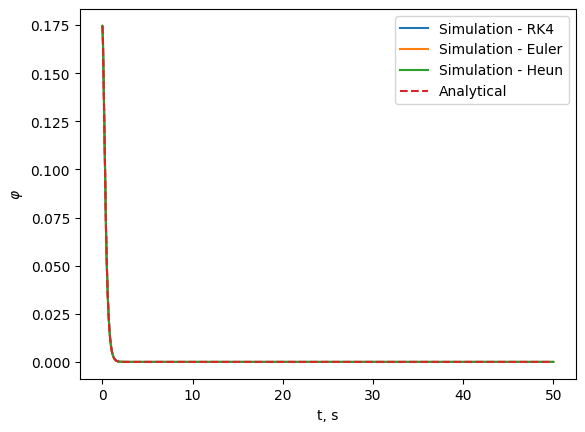

In [17]:
data_rk4 = np.loadtxt(config["output_path_rk4"])
data_h = np.loadtxt(config["output_path_h"])
data_e = np.loadtxt(config["output_path_e"])
w=config["w"]
k=config["k"]
t_rk4, x_rk4, v_rk4 = data_rk4[:, 0], data_rk4[:, 1], data_rk4[:, 2]
t_h, x_h, v_h = data_h[:, 0], data_h[:, 1], data_h[:, 2]
t_e, x_e, v_e = data_e[:, 0], data_e[:, 1], data_e[:, 2]
x_analyt = crit_x(t_rk4,x_rk4[0],k,w)
v_analyt = crit_v(t_rk4,x_rk4[0],k,w)
plt.plot(t_rk4, x_rk4, label="Simulation - RK4")
plt.plot(t_e, x_e, label="Simulation - Euler")
plt.plot(t_h, x_h, label="Simulation - Heun")
plt.plot(t_rk4,x_analyt, label="Analytical", ls="--")
plt.xlabel("t, s")
plt.ylabel(r"$\varphi$")
plt.legend()
plt.show()

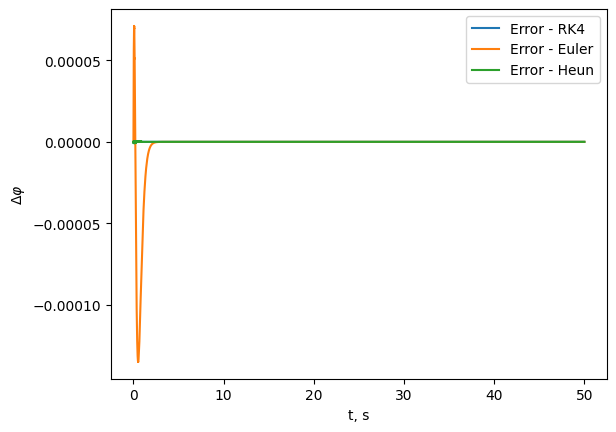

In [18]:
plt.plot(t_rk4,x_rk4-x_analyt, label="Error - RK4")
plt.plot(t_e[:-1],x_e[:-1]-x_analyt, label="Error - Euler")
plt.plot(t_h[:-1],x_h[:-1]-x_analyt, label="Error - Heun")
plt.xlabel("t, s")
plt.ylabel(r"$\Delta\varphi$")
plt.legend()
plt.show()

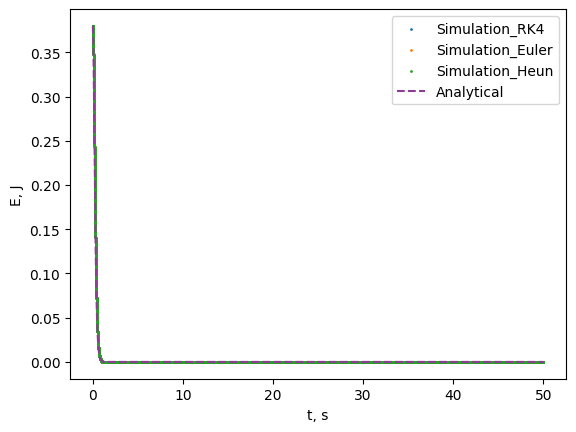

In [19]:
E_rk4=0.5 * v_rk4**2 + w**2 * (1 - np.cos(x_rk4))
plt.scatter(t_rk4, E_rk4, s=1, label="Simulation_RK4")

E_e=0.5 * v_e**2 + w**2 * (1 - np.cos(x_e))
plt.scatter(t_e, E_e, s=1, label="Simulation_Euler")

E_h=0.5 * v_h**2 + w**2 * (1 - np.cos(x_h))
plt.scatter(t_h, E_h, s=1, label="Simulation_Heun")

E_analyt = 0.5 * v_analyt**2 + w**2 * (1 - np.cos(x_analyt))
plt.plot(t_rk4, E_analyt, label="Analytical",color="#8d3b94", ls="--")
plt.xlabel("t, s")
plt.ylabel("E, J")
plt.legend()

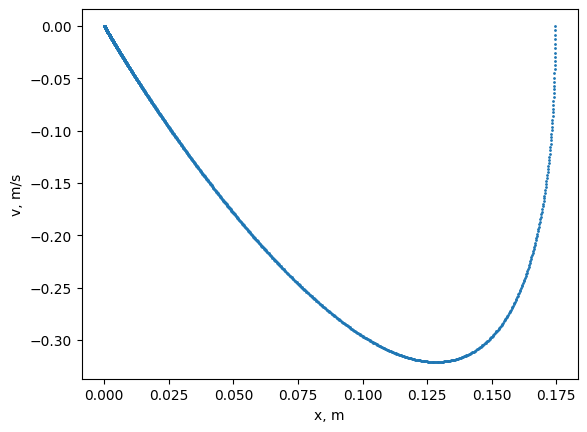

In [ ]:
plt.scatter(x_rk4,v_rk4,s=1)
plt.xlabel("x, m")
plt.ylabel("v, m/s")
plt.title("Phase diagram")

Overdamped oscillations $(\gamma>\omega_0)$

In [20]:
def over_x(t,x0,k,w0):
    a=np.sqrt(-w0**2+k**2)
    return x0*np.exp(-k*t)*(np.cosh(a*t)+k/a*np.sinh(a*t))
def over_v(t,x0,k,w0):
    a=np.sqrt(-w0**2+k**2)
    return -x0*w0**2/a*np.exp(-k*t)*np.sinh(a*t)

In [21]:
current_dir = current_dir = Path.cwd()
config = {
    "dt": 0.001,
    "x0": np.radians(10),
    "v0": 0.0,
    "w": 5.0,
    "k": 10.0,
    "steps": 100000/2,
    "output_path_rk4": current_dir/"output/over_rk4.txt",
    "output_path_h": current_dir/"output/over_h.txt",
    "output_path_e": current_dir/"output/over_e.txt"
}

exe_path = current_dir / "simulator"
config_path = current_dir/ "config_over.json"

config["output_path_rk4"] = str(config["output_path_rk4"])
config["output_path_h"] = str(config["output_path_h"])
config["output_path_e"] = str(config["output_path_e"])


print("exe_path:", exe_path)
print("config_path:", config_path)

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

subprocess.run([str(exe_path), str(config_path)], check=True)

exe_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator
config_path: /workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_over.json


CompletedProcess(args=['/workspaces/Physics-processes-modeling-3-sem/7w/Linear/simulator', '/workspaces/Physics-processes-modeling-3-sem/7w/Linear/config_over.json'], returncode=0)

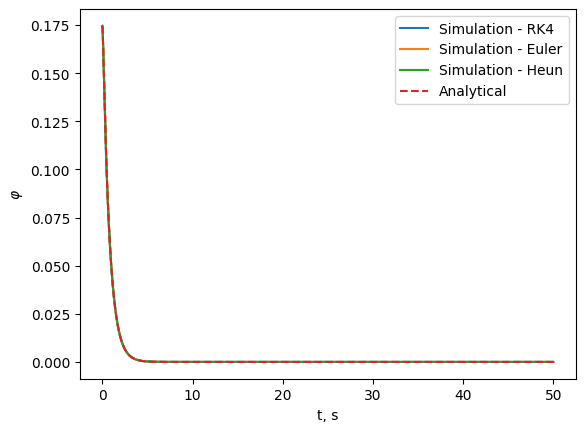

In [24]:
data_rk4 = np.loadtxt(config["output_path_rk4"])
data_h = np.loadtxt(config["output_path_h"])
data_e = np.loadtxt(config["output_path_e"])
w=config["w"]
k=config["k"]
t_rk4, x_rk4, v_rk4 = data_rk4[:, 0], data_rk4[:, 1], data_rk4[:, 2]
t_h, x_h, v_h = data_h[:, 0], data_h[:, 1], data_h[:, 2]
t_e, x_e, v_e = data_e[:, 0], data_e[:, 1], data_e[:, 2]
x_analyt = over_x(t_rk4,x_rk4[0],k,w)
v_analyt = over_v(t_rk4,x_rk4[0],k,w)
plt.plot(t_rk4, x_rk4, label="Simulation - RK4")
plt.plot(t_e, x_e, label="Simulation - Euler")
plt.plot(t_h, x_h, label="Simulation - Heun")
plt.plot(t_rk4,x_analyt, label="Analytical", ls="--")
plt.xlabel("t, s")
plt.ylabel(r"$\varphi$")
plt.legend()
plt.show()

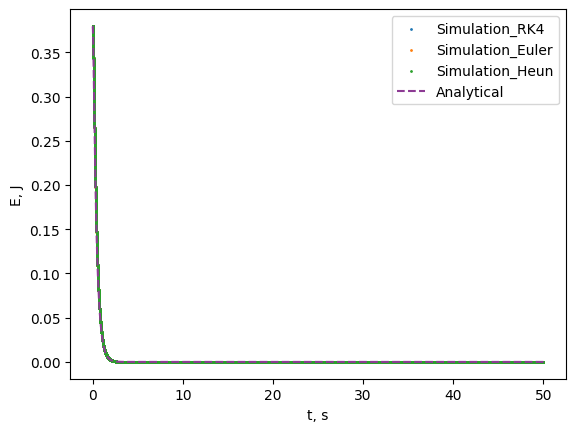

In [25]:
E_rk4=0.5 * v_rk4**2 + w**2 * (1 - np.cos(x_rk4))
plt.scatter(t_rk4, E_rk4, s=1, label="Simulation_RK4")

E_e=0.5 * v_e**2 + w**2 * (1 - np.cos(x_e))
plt.scatter(t_e, E_e, s=1, label="Simulation_Euler")

E_h=0.5 * v_h**2 + w**2 * (1 - np.cos(x_h))
plt.scatter(t_h, E_h, s=1, label="Simulation_Heun")

E_analyt = 0.5 * v_analyt**2 + w**2 * (1 - np.cos(x_analyt))
plt.plot(t_rk4, E_analyt, label="Analytical",color="#8d3b94", ls="--")
plt.xlabel("t, s")
plt.ylabel("E, J")
plt.legend()

Text(0.5, 1.0, 'Phase diagram')

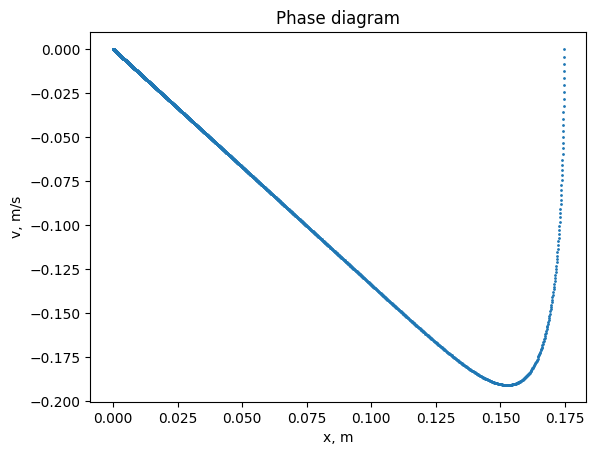

In [26]:
plt.scatter(x_rk4,v_rk4,s=1)
plt.xlabel("x, m")
plt.ylabel("v, m/s")
plt.title("Phase diagram")